# Held-Suarez Default Analysis

In this notebook I want to investigate some of the basics of Held-Suarez simulations.

In [9]:
import xarray as xr
import matplotlib.pyplot as plt

import functions.data_wrangling as data

In [ ]:
ds42 = xr.open_mfdataset(
    '/home/links/ct715/data_storage/isca/held-suarez/processed_simulations/HS_T42_10y_60delh/run*/atmos_daily.nc',
    parallel=True,
)
ds42 = data.data_checker1000(ds42)
ds42

<xarray.Dataset>
Dimensions:      (lon: 128, lonb: 129, lat: 64, latb: 65, time: 3600, nv: 2,
                  phalf: 41, pfull: 40)
Coordinates:
  * lon          (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lonb         (lonb) float64 -1.406 1.406 4.219 7.031 ... 353.0 355.8 358.6
  * lat          (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * latb         (latb) float64 -90.0 -86.58 -83.76 -80.96 ... 83.76 86.58 90.0
  * time         (time) object 2000-01-01 12:00:00 ... 2009-12-30 12:00:00
  * nv           (nv) float64 1.0 2.0
  * phalf        (phalf) float64 0.0 4.489 7.507 11.72 ... 860.7 927.7 1e+03
  * pfull        (pfull) float64 1.651 5.934 9.534 14.38 ... 829.4 894.0 963.6
Data variables:
    ps           (time, lat, lon) float32 dask.array<chunksize=(30, 64, 128), meta=np.ndarray>
    bk           (time, phalf) float32 dask.array<chunksize=(30, 41), meta=np.ndarray>
    pk           (time, phalf) float32 dask.array<chunksize=(30, 41), meta=np.ndarray>
    ucomp        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 40, 64, 128), meta=np.ndarray>
    vcomp        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 40, 64, 128), meta=np.ndarray>
    temp         (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 40, 64, 128), meta=np.ndarray>
    omega        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 40, 64, 128), meta=np.ndarray>
    average_T1   (time) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    average_T2   (time) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    average_DT   (time) timedelta64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    time_bounds  (time, nv) timedelta64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
Attributes:
    filename:   /scratch/ct715/isca_work/experiment/HS_T42_10y_60delh/run/atm...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

## Initial conditions

### Temperature

Text(0.5, 1.0, 'Day 1000')

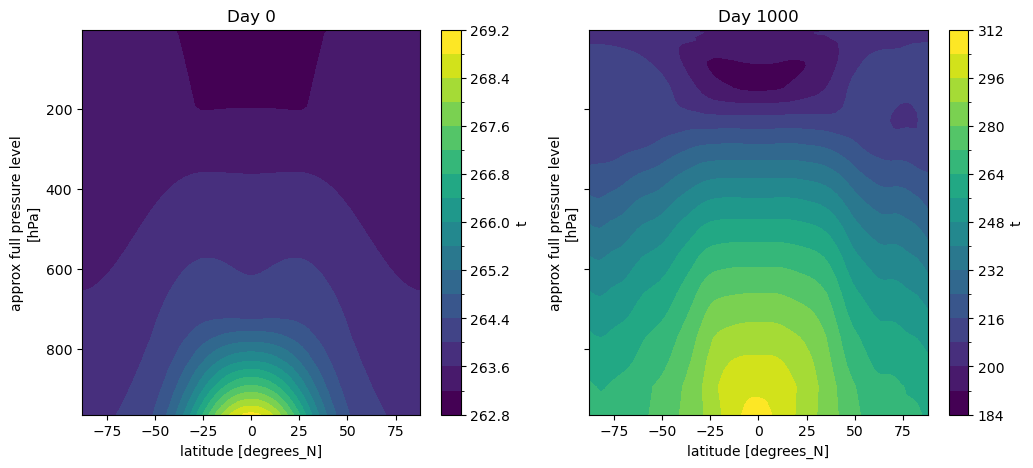

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5), sharey=True)

temp42_ic = ds42.t.mean(('lon')).isel(time=0)
temp42_ic.plot.contourf(levels=20, yincrease=False, ax=ax1)
ax1.set_title('Day 0')

temp42_ic = ds42.t.mean(('lon')).isel(time=1000)
temp42_ic.plot.contourf(levels=20, yincrease=False, ax=ax2)
ax2.set_title('Day 1000')

### Potential temperature

$\theta = T (p_s / p)^\kappa$

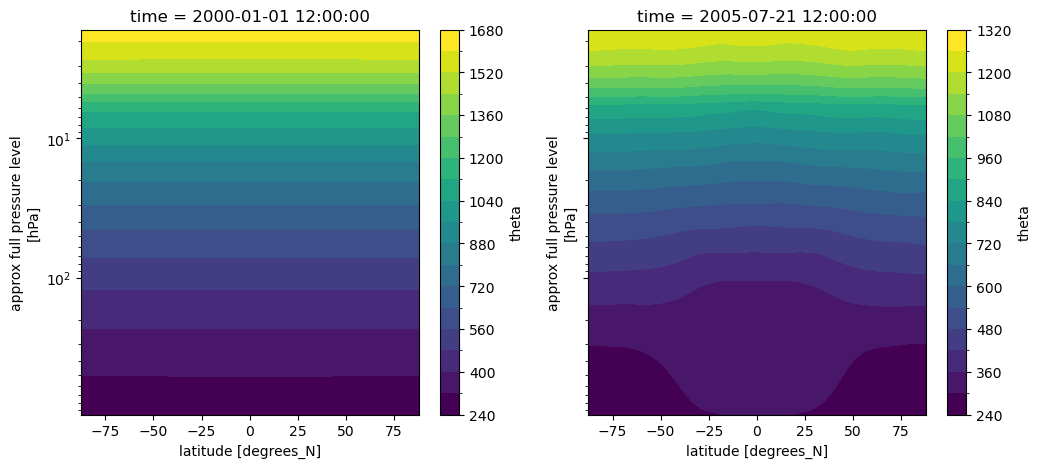

In [22]:
ds42['theta'] = ds42.t * (1000/ds42.level)**(2/7)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5), sharey=True)

potential_temp_ic = ds42.theta.mean('lon').isel(time=0)
potential_temp_ic.plot.contourf(levels=20, yincrease=False, yscale='log', ax=ax1)

potential_temp_1000 = ds42.theta.mean('lon').isel(time=2000)
potential_temp_1000.plot.contourf(levels=20, yincrease=False, yscale='log', ax=ax2)